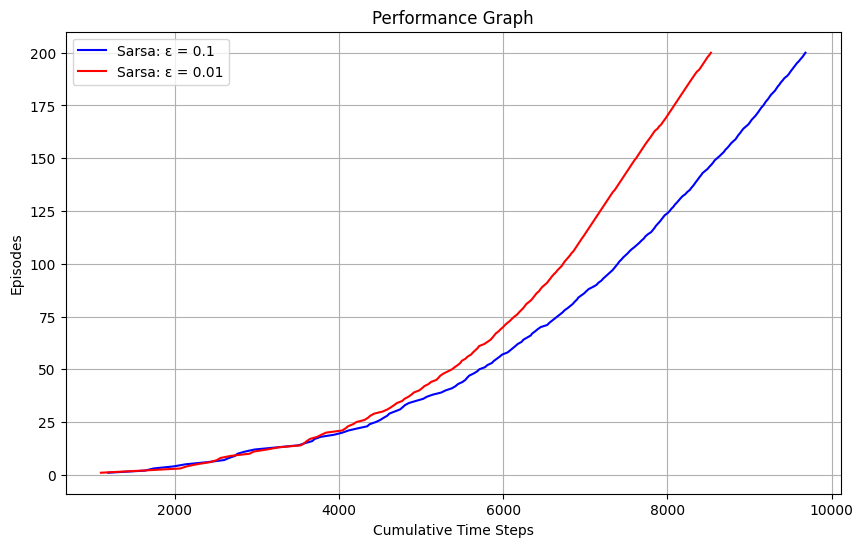

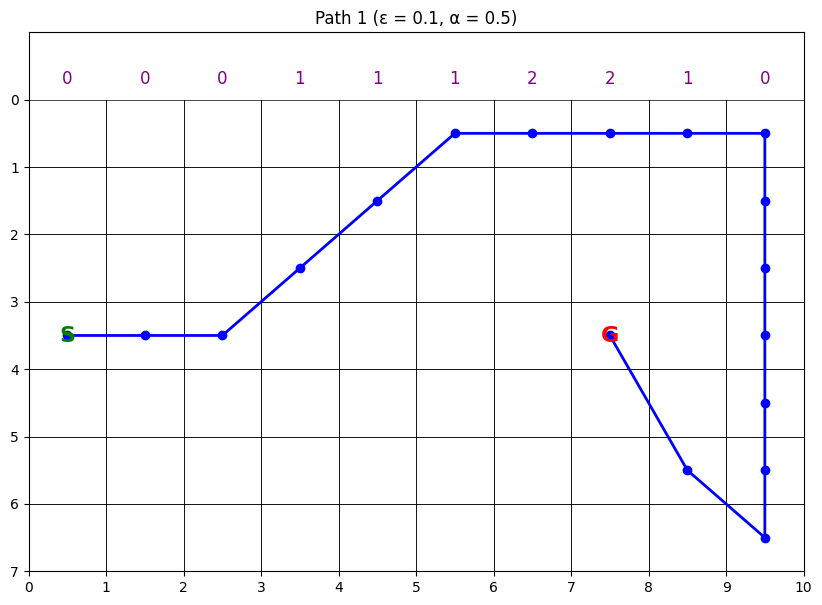

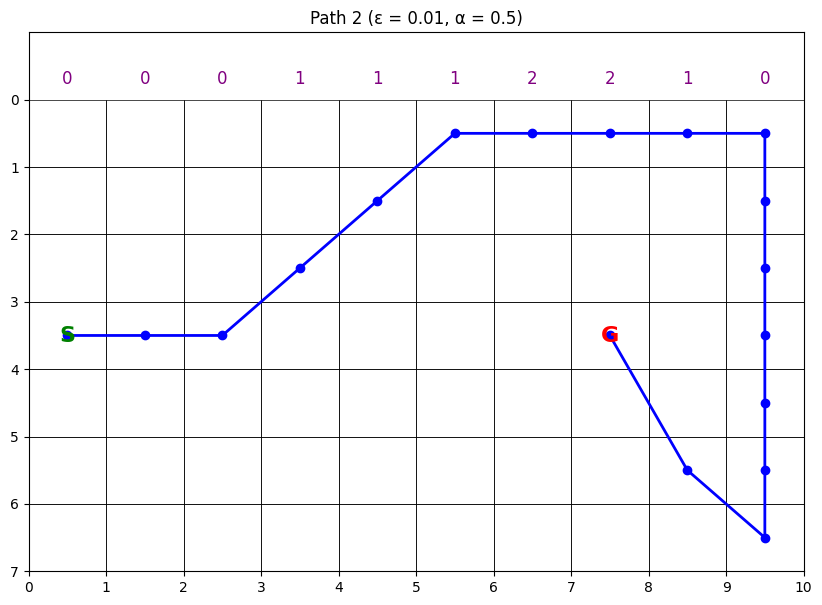

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
ROWS = 7
COLS = 10
START = (3,0)
GOAL = (3,7)
WIND = [0,0,0,1,1,1,2,2,1,0]
ACTIONS = [(-1,0),(+1,0),(0,-1),(0,+1)]
def step(state, action):
    row, col = state
    drow, dcol = ACTIONS[action]
    new_row = row + drow
    new_col = col + dcol
    if 0 <= new_col < COLS:
        wind_strength = WIND[new_col]
    else:
        wind_strength = 0
    new_row -= wind_strength
    new_row = max(0, min(ROWS - 1, new_row))
    new_col = max(0, min(COLS - 1, new_col))
    next_state = (new_row, new_col)
    reward = -1
    terminal = (next_state == GOAL)
    return next_state, reward, terminal
def choose_action(state, Q, epsilon):
    if random.random() < epsilon:
        return random.randint(0, len(ACTIONS) - 1)
    else:
        return np.argmax(Q[state])
def sarsa(epsilon, alpha, num_episodes=200):
    Q = {}
    for r in range(ROWS):
        for c in range(COLS):
            Q[(r, c)] = [0.0, 0.0, 0.0, 0.0]
    episode_steps = []
    time_steps = 0
    for ep in range(num_episodes):
        state = START
        action = choose_action(state, Q, epsilon)
        while True:
            next_state, reward, terminal = step(state, action)
            next_action = choose_action(next_state, Q, epsilon) if not terminal else 0
            Q[state][action] = Q[state][action] + alpha * (reward + Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action
            time_steps += 1
            if terminal:
                break
        episode_steps.append(time_steps)
    return episode_steps, Q
def extract_greedy_path(Q):
    path = []
    state = START
    for _ in range(500):
        path.append(state)
        if state == GOAL:
            break
        action = np.argmax(Q[state])
        state, _, terminal = step(state, action)
        if terminal:
            path.append(GOAL)
            break
    return path
def visualize_path(path, title="Path from Start to Goal"):
    fig, ax = plt.subplots(figsize=(10, 7))
    for r in range(ROWS):
        for c in range(COLS):
            rect = plt.Rectangle((c, r), 1, 1, fill=False, edgecolor='black', linewidth=0.5)
            ax.add_patch(rect)
    ax.text(START[1] + 0.5, START[0] + 0.5, 'S', ha='center', va='center', color='green', fontsize=16, fontweight='bold')
    ax.text(GOAL[1] + 0.5, GOAL[0] + 0.5, 'G', ha='center', va='center', color='red', fontsize=16, fontweight='bold')
    x_coords = [c + 0.5 for (_, c) in path]
    y_coords = [r + 0.5 for (r, c) in path]
    ax.plot(x_coords, y_coords, marker='o', color='blue', linewidth=2)
    for c in range(COLS):
        wind_value = WIND[c]
        ax.text(c + 0.5, -0.3, f"{wind_value}", ha='center', va='center', color='purple', fontsize=12)
    ax.set_xlim(0, COLS)
    ax.set_ylim(-1, ROWS)
    ax.set_xticks(np.arange(0, COLS + 1, 1))
    ax.set_yticks(np.arange(0, ROWS + 1, 1))
    ax.set_title(title)
    ax.invert_yaxis()
    plt.show()
def plot_results(episode_steps_1, episode_steps_2, eps1, eps2):
    plt.figure(figsize=(10, 6))
    episodes = range(1, len(episode_steps_1)+1)
    plt.plot(episode_steps_1, episodes, label=f"Sarsa: ε = {eps1}", color="blue")
    plt.plot(episode_steps_2, episodes, label=f"Sarsa: ε = {eps2}", color="red")
    plt.xlabel("Cumulative Time Steps")
    plt.ylabel("Episodes")
    plt.title("Performance Graph")
    plt.legend()
    plt.grid(True)
    plt.show()
if __name__ == "__main__":
    eps_a = 0.1
    alpha_a = 0.5
    episode_steps_a, Q_a = sarsa(eps_a, alpha_a, num_episodes=200)
    eps_b = 0.01
    alpha_b = 0.5
    episode_steps_b, Q_b = sarsa(eps_b, alpha_b, num_episodes=200)
    plot_results(episode_steps_a, episode_steps_b, eps_a, eps_b)
    visualize_path(extract_greedy_path(Q_a), title="Path 1 (ε = 0.1, α = 0.5)")
    visualize_path(extract_greedy_path(Q_b), title="Path 2 (ε = 0.01, α = 0.5)")